In [1]:
import numpy as np
from sklearn.neighbors import KernelDensity
import sys
import matplotlib.pyplot as plt
import os
import random

In [2]:
def cleanPD(pd, cut, power=0.5):  # Apply cuts onto PDs?
    p0 = []
    p1 = []
    p2 = []
    for elm in pd:
        if elm[0] == 2 and elm[1][1] != elm[1][0] and elm[1][1] > (float(cut) / 2)**2:  # If it is a 2-cycle, birth != death and death > cut (= 0)
            p2.append([np.power(elm[1][0], power), np.power(elm[1][1] - elm[1][0], power)])  # [birth, persistence]
        
        elif elm[0] == 1 and elm[1][1] != elm[1][0] and elm[1][1] > (float(cut) / 2)**2:
            p1.append([np.power(elm[1][0], power), np.power(elm[1][1] - elm[1][0], power)])
        
        elif (np.isinf(elm[1][1])) == False and elm[1][1] != elm[1][0] and elm[1][1] > (float(cut) / 2)**2:  # If death is not infinite, birth != death and death > cut (= 0) 
            p0.append([np.power(elm[1][0], power), np.power(elm[1][1] - elm[1][0], power)])
    return np.array(p0), np.array(p1), np.array(p2)

def PI(sigma=None, pd=None, bounds=None, res=[30, 30]):
    #nbrs = NearestNeighbors(n_neighbors=nn).fit(pd)
    #kde = KernelDensity(bandwidth=sigma, algorithm='kd_tree', kernel='epanechnikov').fit(pd, sample_weight=np.log([1 + abs(elm[1]) for elm in pd]))
    kde = KernelDensity(bandwidth=sigma, algorithm='kd_tree', kernel='gaussian').fit(pd, sample_weight=[elm[1] for elm in pd])
    
    x = np.linspace(bounds[0], bounds[1], res[0])
    y = np.linspace(bounds[2], bounds[3], res[1])
    xx, yy = np.meshgrid(x, y)
    xx = xx.ravel()
    yy = yy.ravel()
    xy_sample = np.array([[xx[i], yy[i]] for i in range(len(xx))])
    d = np.exp(kde.score_samples(xy_sample))
    #distances, indices = nbrs.kneighbors(xy_sample)
    #d = np.array([np.sum([np.log(1 + pd[indices[i][j]][1]) * np.exp(-0.5 * (distances[i][j])**2 / sigma**2) for j in range(len(distances[i]))]) for i in range(len(distances))])
    
    return np.reshape(d, (res[1], res[0])) * sum([elm[1] for elm in pd])

def calcSavePI(p0, p1, p2, bounds, res_len, sigma):       
    # dimPow = 1
    # power = float(dimPow)
    # p0, p1, p2 = cleanPD(diag, 0, power)  # pX = [[birth, persistence], [item 2], [item 3]]

    # bound0=np.concatenate(([np.percentile(p0, 0.1, axis=0)[0], 0], np.percentile(p0, 99.9, axis=0), [np.percentile(p0[:,0]+p0[:,1], 0.1, axis=0)],[np.percentile(p0[:,0]+p0[:,1], 99.9, axis=0)]), axis=0)  # minbirth, minpersis, maxbirth, maxpersis, mindeath, maxdeath
    # bound1=np.concatenate(([np.percentile(p1, 0.1, axis=0)[0], 0], np.percentile(p1, 99.9, axis=0), [np.percentile(p1[:,0]+p1[:,1], 0.1, axis=0)],[np.percentile(p1[:,0]+p1[:,1], 99.9, axis=0)]), axis=0)
    # bound2=np.concatenate(([np.percentile(p2, 0.1, axis=0)[0], 0], np.percentile(p2, 99.9, axis=0), [np.percentile(p2[:,0]+p2[:,1], 0.1, axis=0)],[np.percentile(p2[:,0]+p2[:,1], 99.9, axis=0)]), axis=0)
    # bounds = np.load("bounds.npy")
    bound0 = bounds[0]
    bound1 = bounds[1]
    bound2 = bounds[2]
        
    # img0=PI(5*min([(bound0[2]-bound0[0])/res_len,(bound0[3])/res_len]),p0,[0.9*bound0[0],1.1*bound0[2],0,1.1*bound0[3]],res=[res_len,res_len])  # res=higher the finer
    # img1=PI(5*min([(bound1[2]-bound1[0])/res_len,(bound1[3])/res_len]),p1,[0.9*bound1[0],1.1*bound1[2],0,1.1*bound1[3]],res=[res_len,res_len])
    # img2=PI(5*min([(bound2[2]-bound2[0])/res_len,(bound2[3])/res_len]),p2,[0.9*bound2[0],1.1*bound2[2],0,1.1*bound2[3]],res=[res_len,res_len]) 
    img0=PI(sigma,p0,[0.9*bound0[0],1.1*bound0[2],0,1.1*bound0[3]],res=[res_len,res_len])  # res=higher the finer
    img1=PI(sigma,p1,[0.9*bound1[0],1.1*bound1[2],0,1.1*bound1[3]],res=[res_len,res_len])
    img2=PI(sigma,p2,[0.9*bound2[0],1.1*bound2[2],0,1.1*bound2[3]],res=[res_len,res_len]) 

    return [img0, img1, img2]

In [3]:
PD_list = os.listdir("PD/staging/hyip2/TDAflow/PHGen/PD/")

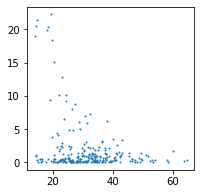

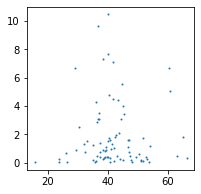

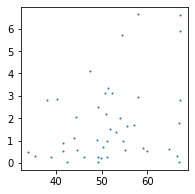

In [4]:
pd = np.load("PD/staging/hyip2/TDAflow/PHGen/PD/{}".format(random.choice(PD_list)))
pd = [[elm[0], [elm[1], elm[2]]] for elm in pd]  # [dimension, [birth, death]]
p0, p1, p2 = cleanPD(pd, 0, 1)


plt.figure(figsize=(3,3))
plt.scatter(p0[:,0], p0[:,1],s=1)
plt.show()
plt.figure(figsize=(3,3))
plt.scatter(p1[:,0], p1[:,1],s=1)
plt.show()
plt.figure(figsize=(3,3))
plt.scatter(p2[:,0], p2[:,1],s=1)
plt.show()

In [5]:
b0_min = []
b0_max = []
b1_min = []
b1_max = []
b2_min = []
b2_max = []
p0_max = []
p1_max = []
p2_max = []
for PD in PD_list:
    pd = np.load("PD/staging/hyip2/TDAflow/PHGen/PD/{}".format(PD))
    pd = [[elm[0], [elm[1], elm[2]]] for elm in pd]  # [dimension, [birth, death]]
    p0, p1, p2 = cleanPD(pd, 0, 1)
    
    b0_min.append(np.amin(p0[:,0]))
    b0_max.append(np.amax(p0[:,0]))
    b1_min.append(np.amin(p1[:,0]))
    b1_max.append(np.amax(p1[:,0]))
    b2_min.append(np.amin(p2[:,0]))
    b2_max.append(np.amax(p2[:,0]))
    p0_max.append(np.amax(p0[:,1]))
    p1_max.append(np.amax(p1[:,1]))
    p2_max.append(np.amax(p2[:,1]))

In [6]:
# bounds0 = [np.amin(b0_min), 0, np.amax(b0_max), np.amax(p0_max)]
# bounds1 = [np.amin(b1_min), 0, np.amax(b1_max), np.amax(p1_max)]
# bounds2 = [np.amin(b2_min), 0, np.amax(b2_max), np.amax(p2_max)]
bounds0 = [np.percentile(b0_min, 10), 0, np.percentile(b0_max, 90), np.percentile(p0_max, 90)]
bounds1 = [np.percentile(b1_min, 10), 0, np.percentile(b1_max, 90), np.percentile(p1_max, 90)]
bounds2 = [np.percentile(b2_min, 10), 0, np.percentile(b2_max, 90), np.percentile(p2_max, 90)]
bounds = [bounds0, bounds1, bounds2]

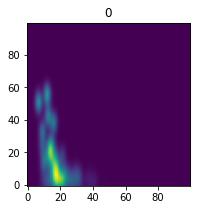

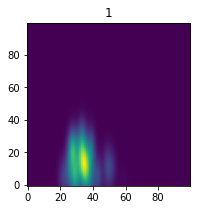

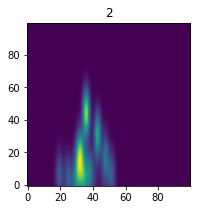

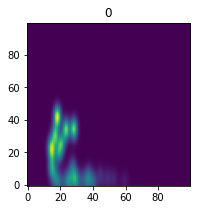

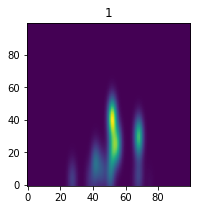

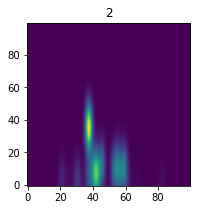

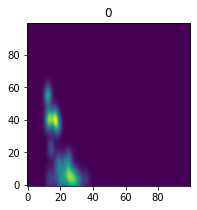

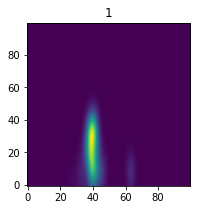

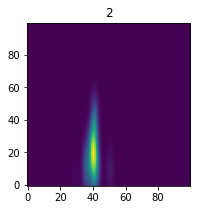

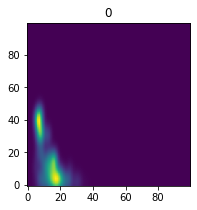

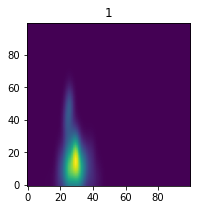

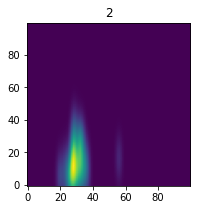

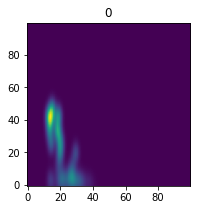

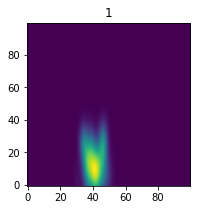

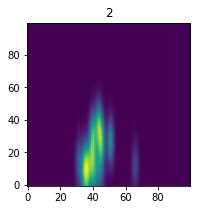

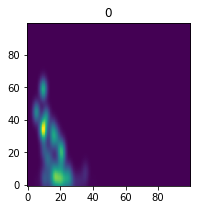

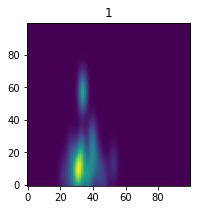

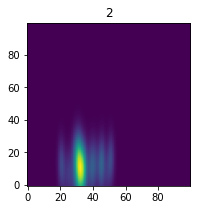

KeyboardInterrupt: 

In [14]:
for i in range(50):
    pd = np.load("PD/staging/hyip2/TDAflow/PHGen/PD/{}".format(random.choice(PD_list)))
    pd = [[elm[0], [elm[1], elm[2]]] for elm in pd]  # [dimension, [birth, death]]
    p0, p1, p2 = cleanPD(pd, 0, 1)
    PIs = calcSavePI(p0, p1, p2, bounds, 100, 2.2)

    plt.figure(figsize=(3,3))
    plt.imshow(PIs[0], origin="lower")
    plt.title("0")
    plt.show()
    plt.figure(figsize=(3,3))
    plt.imshow(PIs[1], origin="lower")
    plt.title("1")
    plt.show()
    plt.figure(figsize=(3,3))
    plt.imshow(PIs[2], origin="lower")
    plt.title("2")
    plt.show()